In [1]:
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt
import scipy.stats as sct
import multiprocessing as mul
# import numba as nb

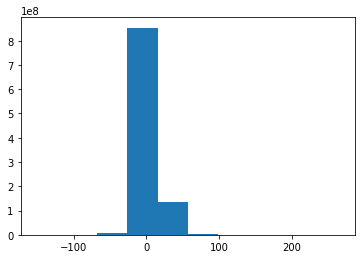

In [2]:
# @cuda.jit
def outer_product(arr):
    prod = np.outer(arr, arr)
    return prod


sizer = 1000
# arr = np.random.lognormal(2, 3, (sizer, 1000))
arr = np.random.normal(2, 3, (sizer, 1000)) #DOES NOT FOLLOW BENFORD'S LAW
# arr = np.random.uniform(2, 3, (sizer, 100)) #DOES NOT FOLLOW BENFORD'S LAW
# arr= np.random.randint(1, 1000, (sizer, 1000)) #DOES NOT FOLLOW BENFORD'S LAW
# arr = np.random.exponential(2, (sizer, 1000)) #FOLLOWS BENFORD'S LAW
# arr = np.random.lognormal(2, 3, (sizer, 1000)) #FOLLOWS BENFORD'S LAW
# arr = np.random.poisson(2, (sizer, 1000)) #FOLLOWS BENFORD'S LAW
pool = mul.Pool(12)
op_async = pool.map_async(outer_product, arr)
arr_all = np.ravel(op_async.get())


# plt.hist(kst_all)
# plt.hist(ksp_all)

plt.hist(arr_all)
plt.show()


In [ ]:
# kst_all = []
# ksp_all = []
# arr_all = []
# for i in range(100):
#     #arr = np.random.normal(2, 3, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#     # arr = np.random.uniform(2, 3, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#     # arr= np.random.randint(1, 1000, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#     # arr = np.random.exponential(2, 1000) #FOLLOWS BENFORD'S LAW
#     arr = np.random.lognormal(2, 3, 1000) #FOLLOWS BENFORD'S LAW
#     # arr = np.random.poisson(2, 1000) #FOLLOWS BENFORD'S LAW

#     prod = np.outer(arr, arr)
#     prod.shape
#     # def benford_law_test(arr, ndigits=10):
#     #     a = np.zeros(ndigits)
#     #     for i in arr:
#     #         a[int(str(i).replace('0.', '').replace('-', '')[0])] += 1

#     #     return a[1:]/np.sum(a)

#     # def ideal_benford_law(ndigits=10):
#     #     return np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)
#     # ideal_ben = ideal_benford_law(10)
#     # bentest = benford_law_test(np.ravel(prod), 10)
#     # kst, ksp = sct.ks_2samp(bentest, ideal_ben)
#     # kst_all.append(kst)
#     # ksp_all.append(ksp)
#     arr_all.append(np.ravel(prod))